## Credit Card Fraud Detection

In this project you will predict fraudulent credit card transactions with the help of Machine learning models. Please import the following libraries to get started.

In [3]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn import metrics
from sklearn import preprocessing

## Exploratory data analysis

In [5]:
df = pd.read_csv(r"C:\Users\vijis\Downloads\310_23498_bundle_archive\creditcard.csv")
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
#observe the different feature type present in the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [5]:
#Describe
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [6]:
df.shape

(284807, 31)

In [7]:
#Null Values
df.isnull().sum().sum()

0

In [8]:
classes=df['Class'].value_counts()
classes

0    284315
1       492
Name: Class, dtype: int64

Here we will observe the distribution of our classes

In [9]:
normal_share=classes[0]/df['Class'].count()*100
fraud_share=classes[1]/df['Class'].count()*100

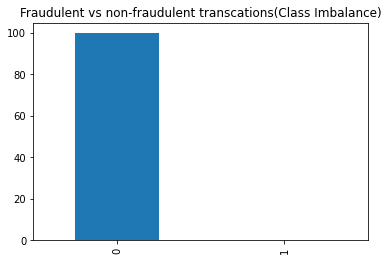

In [10]:
# Create a bar plot for the number and percentage of fraudulent vs non-fraudulent transcations
pt = df['Class'].value_counts(normalize=True) * 100
plt.title('Fraudulent vs non-fraudulent transcations(Class Imbalance)')
pt.plot.bar()

Most of the transactions are non-fraud,Which will not help with prediction of fradulent transaction

In [11]:
fraud = df[df['Class']==1]
normal = df[df['Class']==0]

In [12]:
# Amount of money used in different transaction classes
pd.concat([fraud.Amount.describe(), normal.Amount.describe()], axis=1)


,Amount,Amount
count,492.000000,284315.000000
mean,122.211321,88.291022
std,256.683288,250.105092
min,0.000000,0.000000
25%,1.000000,5.650000
50%,9.250000,22.000000
75%,105.890000,77.050000
max,2125.870000,25691.160000


In [13]:
#Time feature are in seconds we will transform it ot minutes and hours 
timedelta = pd.to_timedelta(df['Time'], unit='s')
df['Time_hour'] = (timedelta.dt.components.hours).astype(int)
df['Time_min'] = (timedelta.dt.components.minutes).astype(int)


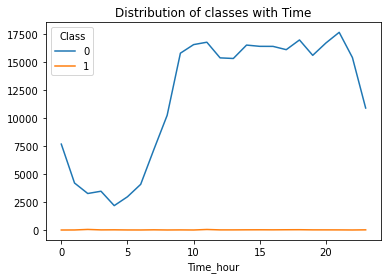

In [14]:
df.groupby(['Time_hour', 'Class']).size().unstack().plot()
plt.title('Distribution of classes with Time')
plt.show()


Text(0.5, 1.0, 'Distribution of classes with Amount(Scatter Plot)')

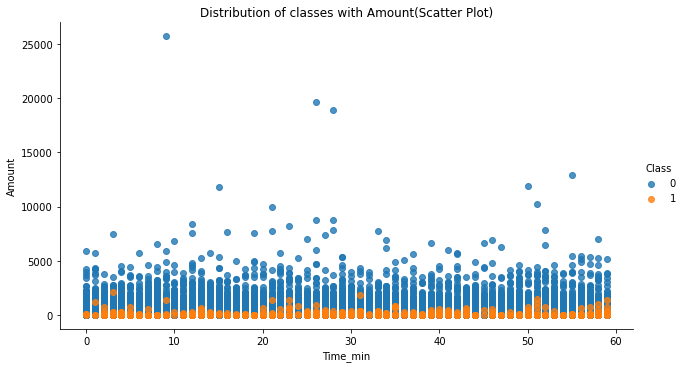

In [15]:
# Create a scatter plot to observe the distribution of classes with Amount
sns.lmplot(y="Amount", x="Time_min", fit_reg=False,aspect=1.8,data=df, hue='Class')
plt.title('Distribution of classes with Amount(Scatter Plot)')

Text(0.5, 1.0, 'Distribution of classes with Amount')

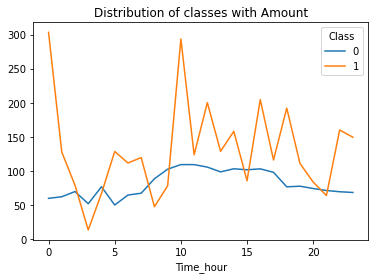

In [16]:
# Create a scatter plot to observe the distribution of classes with Amount
pd.pivot_table(df, index = 'Time_hour', columns = 'Class', values 
= 'Amount').plot();
plt.title('Distribution of classes with Amount')


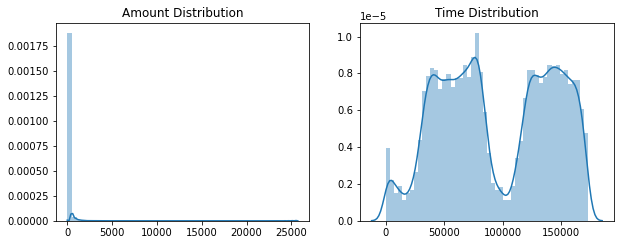

In [17]:
# Distribution of Time and Amount
plt.figure(figsize=(10,8))
plt.subplot(2, 2, 1)
sns.distplot(df['Amount'].values)
plt.title('Amount Distribution')

plt.subplot(2, 2, 2)
sns.distplot(df['Time'].values)
plt.title('Time Distribution')
plt.show()

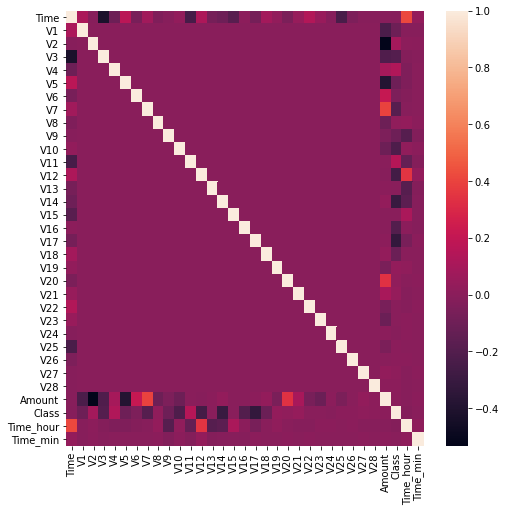

In [18]:
plt.figure(figsize=(8,8))
sns.heatmap(data=df.corr())
plt.show();

In [19]:
d = df.corr()
m = ((d>0.4)&(d!=1))|((d<-0.4)&(d!=-1))
d[m].stack().drop_duplicates().round(3).to_dict()

{('Time', 'V3'): -0.42, ('Time', 'Time_hour'): 0.416, ('V2', 'Amount'): -0.531}

The features does not seem to have multicollinearity

* There is no risk of multicollinearity. 
* V1 to V28 PCA components does not have any correlation with each other.

### Splitting the data into train & test data

In [21]:
X = df.drop('Class',axis=1)
X = df.drop('Time_hour',axis=1)
X = df.drop('Time_min',axis=1)
y = df.Class
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Class, dtype: int64

In [22]:
from sklearn import model_selection
from sklearn.model_selection import train_test_split
# Scaling the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

X_train.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V22,V23,V24,V25,V26,V27,V28,Amount,Class,Time_hour
134955,81047.0,1.146174,-0.083967,0.602963,0.725410,-0.396283,0.186275,-0.318544,0.185287,0.362387,...,0.219314,-0.068172,0.077802,0.482796,0.451360,-0.002776,-0.003524,2.97,0,22
84470,60323.0,-0.918050,0.578744,1.168159,-0.862173,0.969264,0.483973,0.953430,0.188512,-0.866718,...,0.073220,-0.324398,-1.129387,0.622502,0.395548,-0.042526,0.032731,72.73,0,16
176085,122620.0,-2.013096,-3.261460,-1.443935,0.149307,2.734412,-1.572646,0.380914,-0.058952,0.668700,...,0.005726,1.652294,0.136111,-1.705085,-0.522617,-0.031407,0.243772,387.80,0,10
79348,57979.0,-0.767334,0.383415,0.210914,0.035407,0.059217,1.220341,-0.053366,0.718190,-1.945750,...,-0.121835,-0.023886,-1.764699,-0.060345,-0.080600,0.292808,0.112469,105.54,0,16
63554,50771.0,-0.817828,1.621705,0.911472,1.305673,-0.402086,1.031816,-1.972642,-5.092458,-1.570995,...,-0.519522,0.194226,0.138621,0.768231,-0.580148,0.027377,0.213998,28.45,0,14


In [23]:
y_train.value_counts()

0    190477
1       343
Name: Class, dtype: int64

##### Preserve X_test & y_test to evaluate on the test data once you build the model

In [24]:
print(np.sum(y))
print(np.sum(y_train))
print(np.sum(y_test))

492
343
149


### Plotting the distribution of a variable

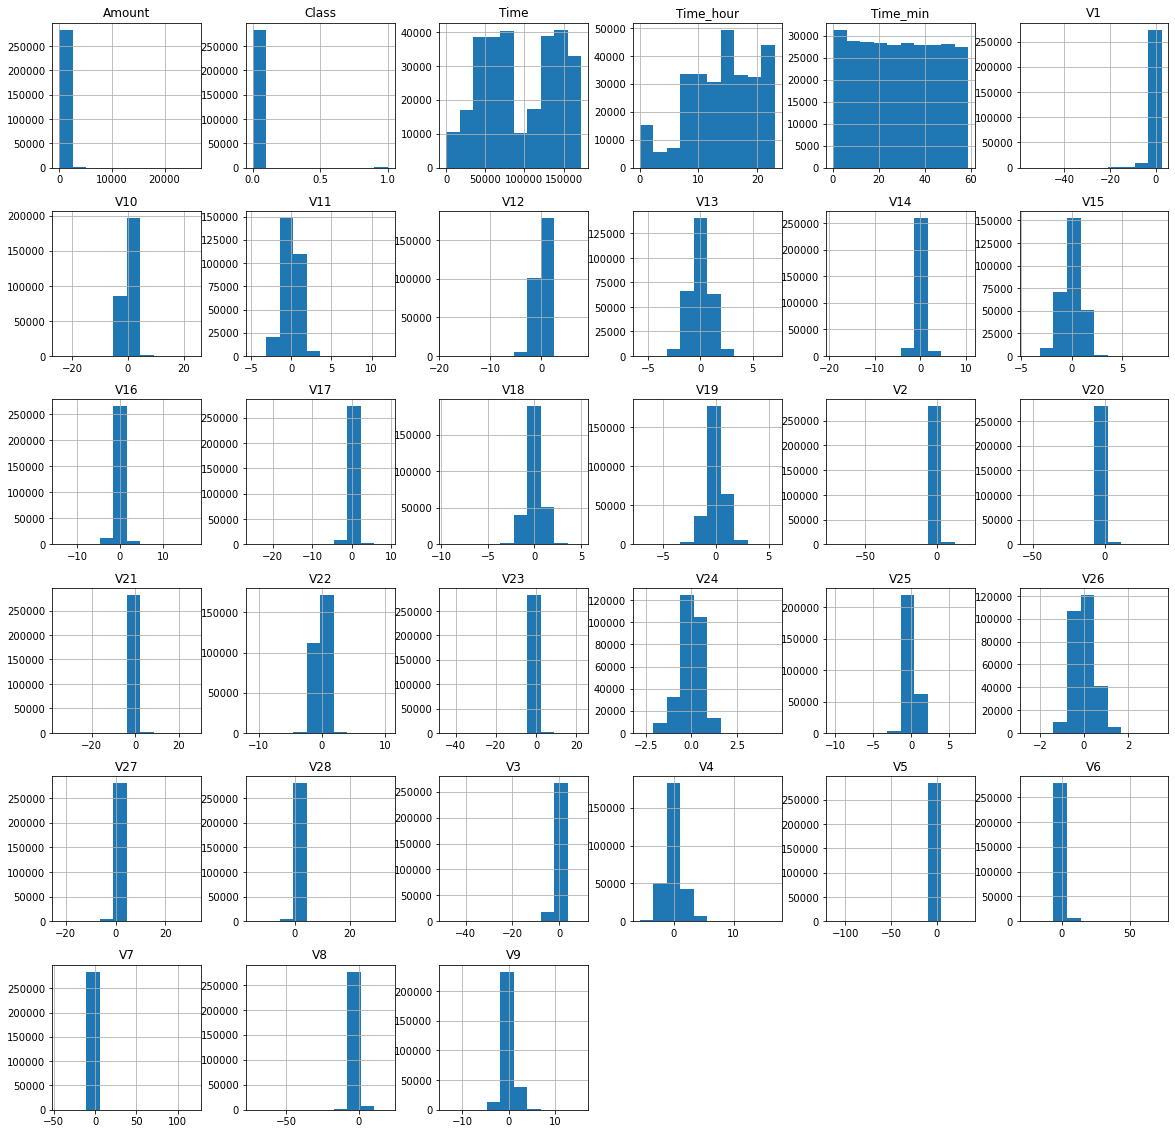

In [25]:
# plot the histogram of a variable from the dataset to see the skewness
df.hist(figsize=(20, 20));

## Model Building


### Logistic Regression + Class Weight

In [26]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, confusion_matrix
from sklearn.metrics import f1_score, roc_auc_score, roc_curve
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

In [27]:
logreg = LogisticRegression().fit(X_train, y_train)
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 1.00


/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [28]:
def generate_model_report(y_actual, y_predicted):
    print("Accuracy = " , accuracy_score(y_actual, y_predicted))
    print("Precision = " ,precision_score(y_actual, y_predicted))
    print("Recall = " ,recall_score(y_actual, y_predicted))
    print("F1 Score = " ,f1_score(y_actual, y_predicted))
    pass

The reason for such an accuracy is imbalance in data.

In [29]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[93784    54]
 [   62    87]]


In [30]:
generate_model_report(y_test, y_pred)

Accuracy =  0.9987657867577431
Precision =  0.6170212765957447
Recall =  0.5838926174496645
F1 Score =  0.6


The F1 score is quite low, Lets try class weight.

### **Balance Weight**

In [31]:
clf = LogisticRegression(class_weight='balanced').fit(X_train, y_train)


/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [32]:
from sklearn.utils import class_weight

In [33]:
class_weight.compute_class_weight('balanced', np.unique(y_train), y_train)

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:71: FutureWarning: Pass classes=[0 1], y=134955    0
84470     0
176085    0
79348     0
63554     0
         ..
119879    0
259178    0
131932    0
146867    0
121958    0
Name: Class, Length: 190820, dtype: int64 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


array([  0.50090037, 278.16326531])

In [34]:
Y_Test_Pred = clf.predict(X_test)

In [35]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, Y_Test_Pred)
print(confusion_matrix)

[[90230  3608]
 [   11   138]]


In [36]:
generate_model_report(y_test, Y_Test_Pred)

Accuracy =  0.9614946747954505
Precision =  0.03683929524826481
Recall =  0.9261744966442953
F1 Score =  0.07086007702182286


This model did not do that well!! The F1 score is quite low.

### We will generate of Range of weights with GridSearchCV

In [37]:
weights = np.linspace(0.05, 0.95, 20)
gsc = GridSearchCV(
    estimator=LogisticRegression(),
    param_grid={
        'class_weight': [{0: x, 1: 1.0-x} for x in weights]
    },
    scoring='f1',
    cv=5
)

grid_result = gsc.fit(X_train, y_train)
print("Best parameters : %s" % grid_result.best_params_)

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


Best parameters : {'class_weight': {0: 0.28684210526315784, 1: 0.7131578947368422}}


/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [38]:
clf = LogisticRegression(**grid_result.best_params_).fit(X_train, y_train)

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [39]:
Y_Test_Pred = clf.predict(X_test)

In [40]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, Y_Test_Pred)
print(confusion_matrix)

[[93792    46]
 [   37   112]]


The False positive has reduced and there is a balance

In [41]:
generate_model_report(y_test, Y_Test_Pred)

Accuracy =  0.9991168991456265
Precision =  0.7088607594936709
Recall =  0.7516778523489933
F1 Score =  0.7296416938110749


F1 Score has increased and the model has produced much better results.

## Model building with balancing Classes

##### Perform class balancing with :
- Random Oversampling
- SMOTE
- ADASYN

## SMOTE + RandomForestClassifier

### Feature Engineering

In [42]:
df_c = df
df_c.drop(['Time'],axis = 1)
df_c.Amount = np.log(df_c.Amount + 0.001)


In [43]:
X = df_c.drop('Class',axis=1)
y = df_c.Class

In [44]:
X_tr, X_te, y_tr, y_te = train_test_split(X, y, random_state=2, test_size=0.20)


In [45]:
from imblearn.over_sampling import SMOTE
from sklearn.pipeline import make_pipeline
from imblearn.pipeline import make_pipeline as make_pipeline_imb
from sklearn.ensemble import RandomForestClassifier

RMC = RandomForestClassifier

Using TensorFlow backend.


In [46]:
smote_pipeline = make_pipeline_imb(SMOTE(random_state=4), \
                                   RMC(random_state=42))

sm= smote_pipeline.fit(X_tr, y_tr)
Y_Test_Pred  = sm.predict(X_te)

In [47]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_te, Y_Test_Pred)
print(confusion_matrix)

[[56869     9]
 [   12    72]]


In [48]:
generate_model_report(y_te, Y_Test_Pred)

Accuracy =  0.9996313331694814
Precision =  0.8888888888888888
Recall =  0.8571428571428571
F1 Score =  0.8727272727272727


The f1 score has improved a lot.

## Hyper Parameter Tuning(RandomForestClassifier)

GridSearchCV

In [49]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score

In [50]:
param_grid = {"max_depth": [5,6, None],
              "n_estimators":[8,10,12],
              "max_features": [6,7,8]}

In [75]:
RF = RandomForestClassifier(max_features=3, max_depth=2 ,n_estimators=10, random_state=3, criterion='entropy', n_jobs=1, verbose=1 )
grid_search = GridSearchCV(RF, param_grid=param_grid, cv=5, scoring='f1')
grid_search.fit(X_tr, y_tr)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    7.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    7.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    8.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_j

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(criterion='entropy', max_depth=2,
                                              max_features=3, n_estimators=10,
                                              n_jobs=1, random_state=3,
                                              verbose=1),
             param_grid={'max_depth': [5, 6, None], 'max_features': [6, 7, 8],
                         'n_estimators': [8, 10, 12]},
             scoring='f1')

In [76]:
print(grid_search.best_params_)

{'max_depth': None, 'max_features': 7, 'n_estimators': 12}


In [51]:
rfc = RandomForestClassifier(max_depth=None, max_features = 7, n_estimators = 12)
rfc.fit(X_tr, y_tr)

RandomForestClassifier(max_features=7, n_estimators=12)

In [52]:
Y_Pred  = rfc.predict(X_te)


In [53]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_te, Y_Pred)
print(confusion_matrix)

[[56872     6]
 [   17    67]]


In [54]:
generate_model_report(y_te, Y_Pred)

Accuracy =  0.9995962220427653
Precision =  0.9178082191780822
Recall =  0.7976190476190477
F1 Score =  0.8535031847133758


The F1 Score is good compared to Logistic regression model. The model is performing pretty good.

## XGBClassifier + UnderSampling

In [55]:
fr_class_len = len(df[df['Class'] == 1])
print(fr_class_len)

492


In [56]:
nfr_class_indices = df[df['Class'] == 0].index
print(nfr_class_indices)

Int64Index([     0,      1,      2,      3,      4,      5,      6,      7,
                 8,      9,
            ...
            284797, 284798, 284799, 284800, 284801, 284802, 284803, 284804,
            284805, 284806],
           dtype='int64', length=284315)


In [57]:
random_majority_indices = np.random.choice(nfr_class_indices,
                                           fr_class_len, 
                                           replace=False)
print(len(random_majority_indices))

492


In [59]:
fr_class_indices = df[df['Class'] == 1].index
print(fr_class_indices)

Int64Index([   541,    623,   4920,   6108,   6329,   6331,   6334,   6336,
              6338,   6427,
            ...
            274382, 274475, 275992, 276071, 276864, 279863, 280143, 280149,
            281144, 281674],
           dtype='int64', length=492)


In [60]:
under_sample_indices = np.concatenate([fr_class_indices,random_majority_indices])

In [61]:
under_sample = df.loc[under_sample_indices]

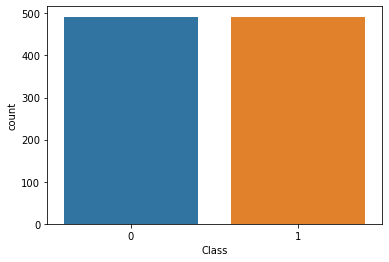

In [63]:
sns.countplot(x='Class', data=under_sample)

The class weights have been equally balanced

In [64]:
target= 'Class'
X = under_sample.loc[:, df.columns!=target]
Y = under_sample.loc[:, df.columns==target]

In [65]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

In [68]:
from xgboost import XGBClassifier
model = XGBClassifier()
model.fit(X_train, Y_train)

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [69]:
Y_Pred  = rfc.predict(X_test)

In [70]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(Y_test, Y_Pred)
print(confusion_matrix)

[[161   0]
 [ 14 150]]


In [72]:
generate_model_report(Y_test, Y_Pred)

Accuracy =  0.9569230769230769
Precision =  1.0
Recall =  0.9146341463414634
F1 Score =  0.9554140127388536


Even the model is doing well, we have lost a lot of data due to undersampling.

### CONCLUSION:

Logistic regression with class weight gave F1 score of about 0.70

#### The best score was for SMOTE + RandomForest, that performed a f1 score of 0.853

Even though XGBclassifier + undersampling gave a good score we lost a lot of data